# Introduction


In this kernel you will go through the whole process of creating a machine learning model on the famous Titanic dataset,
which is used by many people all over the world. It provides information on the fate of passengers on the Titanic,
summarized according to economic status (class), sex, age and survival. In this challenge, you will predict whether a
passenger on the titanic would have been survived or not.


# About Titanic
RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912,
after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224
passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime
maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the
second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff
shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.
# About the Data Set
We have data of all passengers and the problem statement is to predict the survival of a passenger given his current data
inputs.

# Loading Data and Diagnostics
Let's import all required packages. Each package will be explained whenever it is used

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Let's load the datset. Please keep the data at your pwd or pass full path of data to pd. rad csv.

In [2]:
test_df=pd.read_csv("test_titanic.csv")
train_df=pd.read_csv("train_titanic.csv")

Check the info of dataset to get an idea of how its looking. !!

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers
and 5 are objects. Below I have listed the features with a short description:

survival: Survival

PassengerId: Unique Id of a passenger.

© All Rights Reserved

pclass: Ticket class

sex: Sex

Age: Age in years

sibsp: # of siblings / spouses aboard the Titanic

parch: # of parents / children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation

# Missing values

Let's look at how describe functiongives output

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from
0.4 to 80. On top of that we can already detect some features, that contain missing values, like the 'Age' feature. Also we can
find outliers if any by visual observation of quartiles.
Let's look at head of the data

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later
on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely
different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain
missing values (NaN = not a number), that wee need to deal with.

Let's take a more detailed look at what data is actually missing:

In [7]:
total=train_df.isnull().sum().sort_values(ascending=False) # Gives Null values in each column
percent_1=train_df.isnull().sum()/train_df.isnull().count()*100 # make it as a percentage of whole values
percent_2=(round(percent_1,1)).sort_values(ascending=False) # rounding the percentage
missing_data=pd.concat([total,percent_2],axis=1,keys=['Total','%'])# making it as a single data frame values and percentages
missing_data.head()



,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


If you notice, Cabin has the highest percentage. The Embarked feature has only 2 missing values, which can easily be filled. It
will be much more tricky, to deal with the 'Age' feature, which has 177 missing values. The 'Cabin' feature needs further
investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

The below are the columns values.

In [8]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# EDA Plotting 

# 1. Age vs Sex

Let's plot age and sex and check the relationship. The code is as follows.

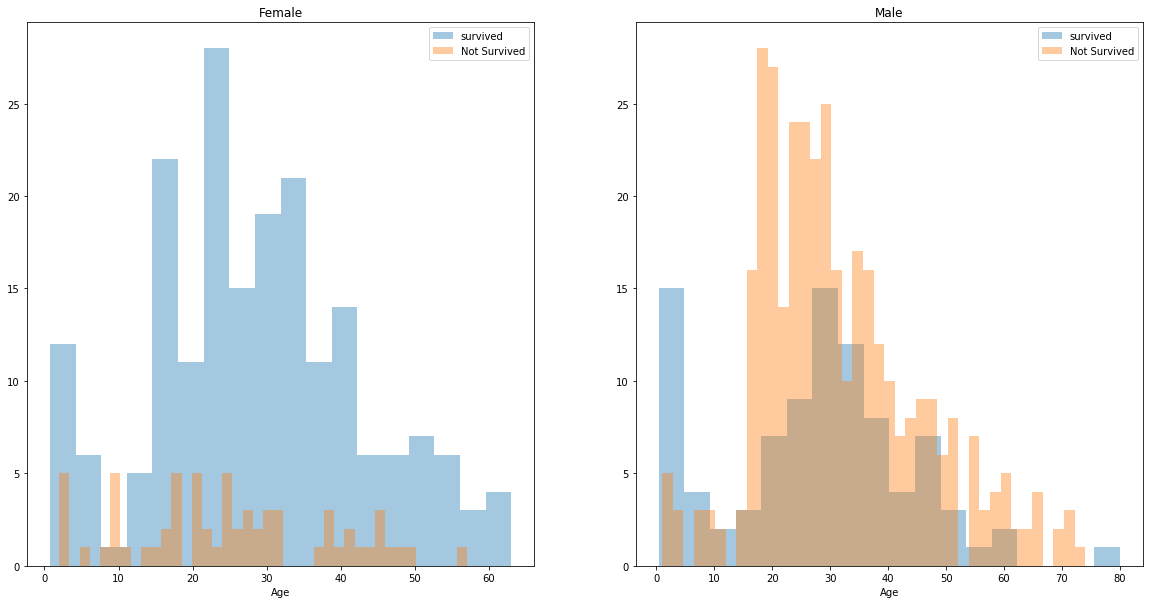

In [9]:
survived = 'survived'
not_survived = 'Not Survived'
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,10)) # Initializing the plots
women=train_df[train_df['Sex']=='female']
men=train_df[train_df['Sex']=='male']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18,label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=40,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(),bins=18,label=survived,ax=axes[1],kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(),bins=40,label=not_survived,ax=axes[1],kde=False)
ax.legend()
_=ax.set_title('Male')

You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit
true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn't true for women. Another thing to
note is that infants also have a little bit higher probability of survival.

Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on
the same scale, I will create age groups later on.

# 2. Embarked, Pclass and Sex:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


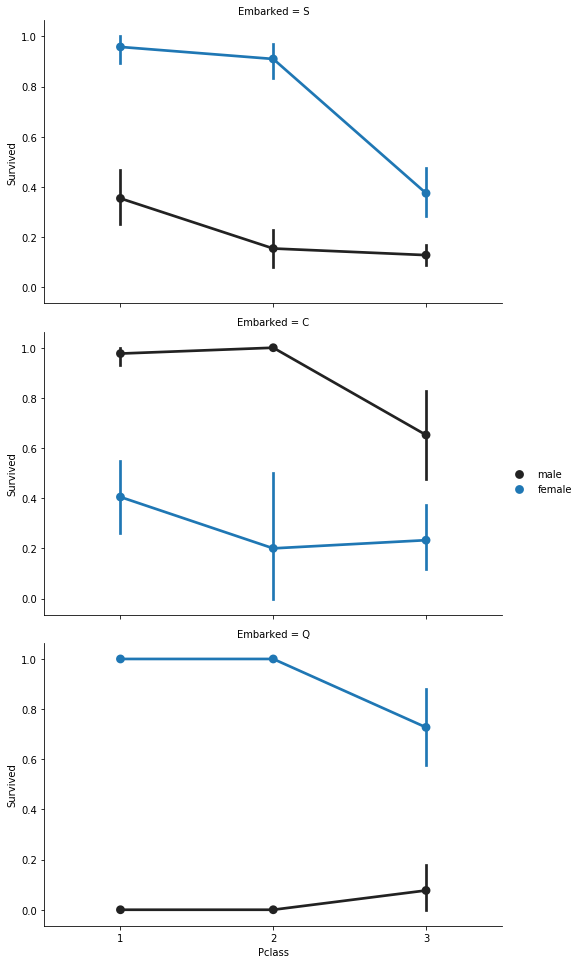

In [10]:
FacetGrid=sns.FacetGrid(train_df,row='Embarked',size=4.5,aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass','Survived','Sex',palette=None,order=None,hue_order=None)
FacetGrid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


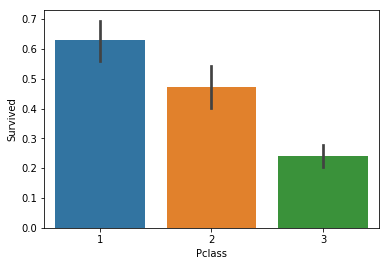

In [11]:
sns.barplot(x='Pclass',y='Survived', data=train_df)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


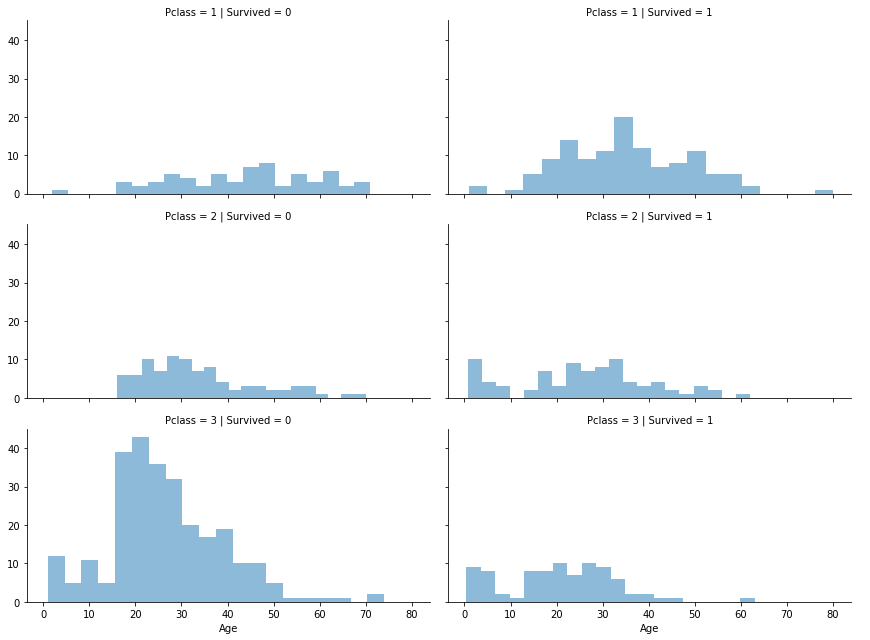

In [12]:
grid=sns.FacetGrid(train_df,col='Survived', row='Pclass', size=3,aspect=2)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

Being along and survival rate has high dependency. We want to see it. Creating a new feature - 'not_alone'

In [13]:
data= [train_df,test_df]
for dataset in data:
    dataset['relatives']=dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['relatives']>0, 'not_alone']=0
    dataset.loc[dataset['relatives']==0, 'not_alone']=1
    dataset['not_alone']=dataset['not_alone'].astype(int)

In [14]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


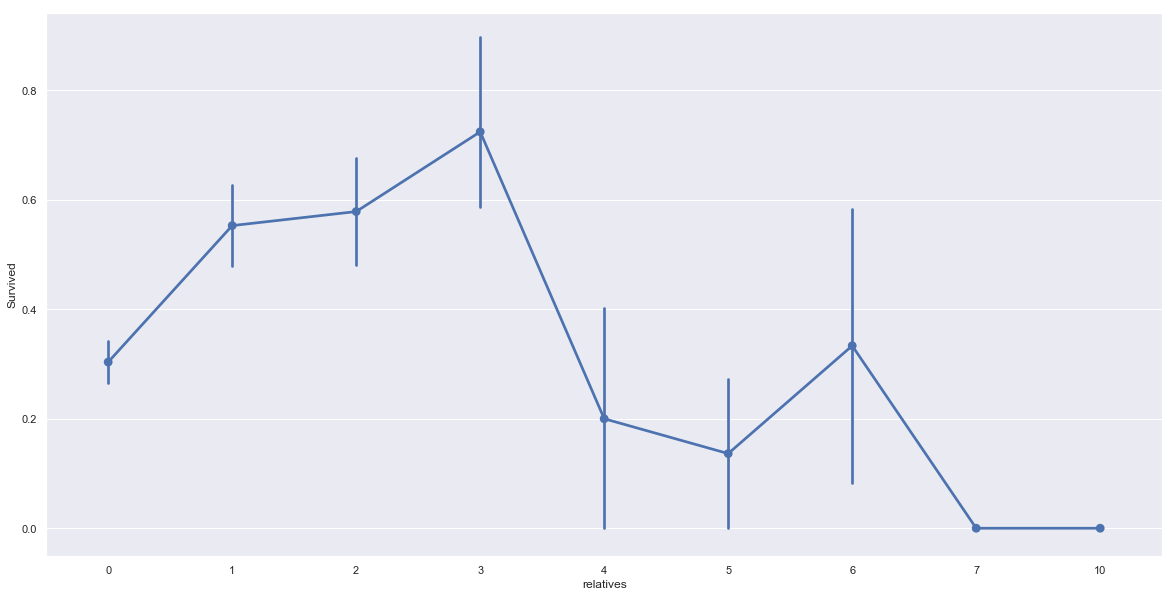

In [15]:
plt.figure(figsize=(20,10)) # Initializing the plotsize
sns.set(style="darkgrid")
ax = sns.pointplot(x="relatives", y="Survived", data=train_df)

# Basic_Preprocess

As a first step,we will see if any features are irrelevant. After a quick glance at columns, I found passenger ID as irrelevant. I
will drop 'PassengerId' from the train set, because it does not contribute to a persons survival probability. I will not drop it
from the test set, since it is required there for the submission

In [16]:
train_df=train_df.drop(['PassengerId'],axis=1)

# Missing Data in cabin :
As a reminder, we have to deal with Cabin (687), Embarked (2) and Age (177). First I thought, we have to delete the 'Cabin'
variable but then I found something interesting. A cabin number looks like ‘C123’ and the letter refers to the deck.
Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the
feature into a numeric variable. The missing values will be converted to zero. In the picture below you can see the actual
decks of the titanic, ranging from A to G.

In [17]:
import re
deck={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}
data = [train_df,test_df]
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("UO")
    dataset['Deck']=dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck']=dataset['Deck'].map(deck)
    dataset['Deck']=dataset['Deck'].fillna(0)
    dataset['Deck']=dataset['Deck'].astype(int)

we can now drop the cabin feature

In [18]:
train_df=train_df.drop(['Cabin'],axis=1)
test_df=test_df.drop(['Cabin'],axis=1)

In [19]:
train_df['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

# Missing data in Age:
Now we can tackle the issue with the age features missing values. I will create an array that contains random numbers, which
are computed based on the mean age value in regards to the standard deviation and is_null.

In [20]:
train_df['Age'].isnull().sum()

177

In [21]:
data=[train_df,test_df]
for dataset in data:
    mean=dataset["Age"].mean()
    std=dataset["Age"].std()
    is_null=dataset["Age"].isnull().sum()
    #compute random numbers between the mean,std and is_null
    rand_age=np.random.randint(mean-std,mean+std,size=is_null)
    #fill Nan values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)]=rand_age
    dataset["Age"]=age_slice
    dataset["Age"]=dataset["Age"].astype(int)
    

In [22]:
train_df.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     2
relatives    0
not_alone    0
Deck         0
dtype: int64

In [23]:
train_df.shape

(891, 13)

# Missing data in Embarked:
Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [24]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     889 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.1+ KB


Above you can see that 'Fare' is a float and we have to deal with 4 categorical features: Name, Sex, Ticket and Embarked. Lets
investigate and transfrom one after another.

Fare: Converting "Fare" from float to int64, using the "astype()" function pandas provides:

In [26]:
data=[train_df,test_df]
for dataset in data:
    dataset['Fare']=dataset['Fare'].fillna(0)
    dataset['Fare']=dataset['Fare'].astype(int)

Name: We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.
Even the name has some meaning. We cannot afford miss information
Dropping name

In [27]:
data=[train_df,test_df]
titles={"Mr":1,"Miss":2,"Mrs":3,"Mraste":4,"Rare":5}
for dataset in data:
    #Extract tiles
    dataset['Title']=dataset.Name.str.extract('([a-zA-Z]+)\.',expand=False)
    dataset['Title']=dataset['Title'].replace(['Lady','Countless','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkeer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    #convert titles into numbers
    dataset['Title']=dataset['Title'].map(titles)
    # filling Nan values with 0, to get safe
    dataset['Title']=dataset['Title'].fillna(0)


Even the name has some meaning. We cannot afford miss information

Dropping name 

In [28]:
train_df=train_df.drop(['Name'],axis=1)
test_df=test_df.drop(['Name'],axis=1)

In [29]:
 train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,0,1.0
1,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3.0
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,0,2.0
3,1,1,female,35,1,0,113803,53,S,1,0,3,3.0
4,0,3,male,35,0,0,373450,8,S,0,1,0,1.0


Sec feature : It is categorical but we have to convert 'Sex' feature into numeric.

In [30]:
genders={"male":0,"female":1}
data=[train_df,test_df]
for dataset in data:
    dataset['Sex']=dataset['Sex'].map(genders)

In [31]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,0,0,1.0
1,1,1,1,38,1,0,PC 17599,71,C,1,0,3,3.0
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,1,0,2.0
3,1,1,1,35,1,0,113803,53,S,1,0,3,3.0
4,0,3,0,35,0,0,373450,8,S,0,1,0,1.0


# Ticket price
Look at ticket price

In [32]:
train_df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it
from the dataset.

In [33]:
train_df=train_df.drop(['Ticket'],axis=1)
test_df=test_df.drop(['Ticket'],axis=1)

Embarked:Though below can be done in many ways, this is one of the way.

In [34]:
ports={"S":0,"C":1,"Q":2}
data=[train_df,test_df]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(ports)

# Feature Engineering
We will now create categories within the following features:

Age:

Now we need to convert the 'age' feature. First we will convert it from float into integer. Then we will create the new
'AgeGroup" variable, by categorizing every age into a group. Note that it is important to place attention on how you form
these groups, since you don't want for example that 80% of your data falls into group 1.

In [35]:
data=[train_df,test_df]
for dataset in data:
    dataset['Age']=dataset['Age'].astype(int)
    dataset.loc[dataset['Age']<=11,'Age']=0
    dataset.loc[(dataset['Age']>11) & (dataset['Age']<=18),'Age']=1
    dataset.loc[(dataset['Age']>18) & (dataset['Age']<=22),'Age']=2
    dataset.loc[(dataset['Age']>22) & (dataset['Age']<=27),'Age']=3
    dataset.loc[(dataset['Age']>27) & (dataset['Age']<=33),'Age']=4
    dataset.loc[(dataset['Age']>33) & (dataset['Age']<=40),'Age']=5
    dataset.loc[(dataset['Age']>40) & (dataset['Age']<=66),'Age']=6
    dataset.loc[dataset['Age']>66,'Age']=6

This can also be acheived in single line with Pd.Cut. You can give a try.

Now the distribution looks as follows

In [36]:
train_df['Age'].value_counts()

6    171
4    159
5    150
3    139
2    115
1     89
0     68
Name: Age, dtype: int64

Similarly for the fare , we do same approach, For the 'Fare' feature, we need to do the same as with the 'Age' feature. But it
isn't that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall
into the first category. Fortunately, we can use sklearn "qcut()" function, that we can use to see, how we can form the
categories.

Current data frame looks as follows

In [37]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0.0,1,0,0,1.0
1,1,1,1,5,1,0,71,1.0,1,0,3,3.0
2,1,3,1,3,0,0,7,0.0,0,1,0,2.0
3,1,1,1,5,1,0,53,0.0,1,0,3,3.0
4,0,3,0,5,0,0,8,0.0,0,1,0,1.0
5,0,3,0,5,0,0,8,2.0,0,1,0,1.0
6,0,1,0,6,0,0,51,0.0,0,1,5,1.0
7,0,3,0,0,3,1,21,0.0,4,0,0,0.0
8,1,3,1,3,0,2,11,0.0,2,0,0,3.0
9,1,2,1,1,1,0,30,1.0,1,0,0,3.0


Fare binning code is as follows

In [38]:
data=[train_df,test_df]
for dataset in data:
    dataset['Fare']=dataset['Fare'].astype(int)
    dataset.loc[dataset['Fare']<=7,'Fare']=0
    dataset.loc[(dataset['Fare']>7) & (dataset['Fare']<=14),'Fare']=1
    dataset.loc[(dataset['Fare']>14) & (dataset['Fare']<=31),'Fare']=2
    dataset.loc[(dataset['Fare']>31) & (dataset['Fare']<=99),'Fare']=3
    dataset.loc[(dataset['Fare']>99) & (dataset['Fare']<=250),'Fare']=4
    dataset.loc[dataset['Fare']>250,'Fare']=5

In [39]:
data=[train_df,test_df]
for dataset in data:
    dataset['Age_class']=dataset['Age']*dataset['Pclass']

In [40]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_class
0,0,3,0,2,1,0,0,0.0,1,0,0,1.0,6
1,1,1,1,5,1,0,3,1.0,1,0,3,3.0,5
2,1,3,1,3,0,0,0,0.0,0,1,0,2.0,9
3,1,1,1,5,1,0,3,0.0,1,0,3,3.0,5
4,0,3,0,5,0,0,1,0.0,0,1,0,1.0,15


In [41]:
train_df['Embarked']=train_df['Embarked'].fillna(0)

In [42]:
train_df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
relatives    0
not_alone    0
Deck         0
Title        0
Age_class    0
dtype: int64

Test and Train Data

In [43]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test =test_df.drop("PassengerId",axis=1).copy()

# Models

# 1.Stochastic gradient descent model

In [44]:
# SGD learning
sgd=linear_model.SGDClassifier(max_iter=5,tol=None)
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)
sgd.score(X_train,Y_train)
acc_sgd=round(sgd.score(X_train,Y_train)*100,2)
print(" SGD Accuracy is : ",round(acc_sgd,2,),"%")

 SGD Accuracy is :  79.8 %


# 2.Random forest

In [45]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
rf.score(X_train,Y_train)
acc_rf=round(rf.score(X_train,Y_train)*100,2)
print("Ranodm Forest Accuracy is : ",round(acc_rf,2,),"%")

Ranodm Forest Accuracy is :  92.82 %


# 3.Logistic Regression

In [46]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
lr.score(X_train,Y_train)
acc_lr=round(lr.score(X_train,Y_train)*100,2)
print("Logistic Regression Accuracy is : ",round(acc_lr,2,),"%")

Logistic Regression Accuracy is :  80.36 %


# 4.KNN 

In [47]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
knn.score(X_train,Y_train)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
print("KNN Accuracy is : ",round(acc_knn,2,),"%")

KNN Accuracy is :  85.41 %


# 5.Naive Bayes

In [48]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
Y_pred=gnb.predict(X_test)
gnb.score(X_train,Y_train)
acc_gnb=round(gnb.score(X_train,Y_train)*100,2)
print("Naive Bayes Accuracy is : ",round(acc_gnb,2,),"%")

Naive Bayes Accuracy is :  77.55 %


# 6.Perceptron model

In [49]:
perceptron=Perceptron(max_iter=5)
perceptron.fit(X_train,Y_train)
Y_pred=perceptron.predict(X_test)
perceptron.score(X_train,Y_train)
acc_perceptron=round(perceptron.score(X_train,Y_train)*100,2)
print("Perceptron Accuracy is : ",round(acc_perceptron,2,),"%")

Perceptron Accuracy is :  79.8 %


# 7.Linear SVC

In [50]:
lsvc=LinearSVC()
lsvc.fit(X_train,Y_train)
Y_pred=lsvc.predict(X_test)
lsvc.score(X_train,Y_train)
acc_lsvc=round(lsvc.score(X_train,Y_train)*100,2)
print("Linear SVC Accuracy is : ",round(acc_lsvc,2,),"%")

Linear SVC Accuracy is :  80.81 %


# 8.Decision Tree

In [51]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred=dt.predict(X_test)
dt.score(X_train,Y_train)
acc_dt=round(dt.score(X_train,Y_train)*100,2)
print("Decision Tree Accuracy is : ",round(acc_dt,2,),"%")

Decision Tree Accuracy is :  92.82 %


# Final Results of the Models

In [52]:
results=pd.DataFrame({
    'Model':['Support Vector Machine','KNN','Logistic Regression','Random Forest','Naive Bytes','Perceptron',
             'Stochastic Gradient Descent','Decision Tree'],
    'Scores':[acc_lsvc,acc_knn,acc_lr,acc_rf,acc_gnb,acc_perceptron,acc_sgd,acc_dt]})
result_df=results.sort_values(by='Scores',ascending=False)
result_df=result_df.set_index('Scores')
result_df.head(9)

,Model
Scores,
92.82,Random Forest
92.82,Decision Tree
85.41,KNN
80.81,Support Vector Machine
80.36,Logistic Regression
79.80,Perceptron
79.80,Stochastic Gradient Descent
77.55,Naive Bytes


# Cross Validation

K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let's image we would split our data into 4
folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation
everytime, while it would be trained on the remaining 3 folds.

The image below shows the process, using 4 folds (K = 4). Every row represents one training + evaluation process. In the first
row, the model get's trained on the first, second and third subset and evaluated on the fourth. In the second row, the model
get's trained on the second, third and fourth subset and evaluated on the first. K-Fold Cross Validation repeats this process till
every fold acted once as an evaluation fold.

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to
compute the mean and the standard deviation for these scores.

The code below perform K-Fold Cross Validation on our Decision Tree model, using 10 folds (K = 10). Therefore it outputs an
array with 10 different scores.

In [53]:
from sklearn.model_selection import cross_val_score
dt= DecisionTreeClassifier()
scores=cross_val_score(dt,X_train,Y_train,cv=10,scoring="accuracy")

In [54]:
print("Scores:",scores)
print("Mean:",scores.mean())
print("Standard Deviation:",scores.std())

Scores: [0.75555556 0.75555556 0.75280899 0.79775281 0.84269663 0.82022472
 0.80898876 0.80898876 0.87640449 0.78409091]
Mean: 0.8003067188741346
Standard Deviation: 0.03829634581854609


This looks much more realistic than before. Our model has a average accuracy of 81.5% with a standard deviation of 4.5 %. The
standard deviation shows us, how precise the estimates are . This means in our case that the accuracy of our model can
differ + - 4.5%.
I think the accuracy is still really good and since Decision tree is an easy to use model, we will try to increase it's
performance even further in the following section.

Another great quality of decision tree is that they make it very easy to measure the relative importance of each feature.
Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on
average (across all trees). It computes this score automaticall for each feature after training and scales the
results so that the sum of all importances is equal to 1. We will acces this below:

In [56]:
dt.fit(X_train,Y_train)
importances=pd.DataFrame({'feature':X_train.columns,'importance':np.round(dt.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.375
relatives,0.116
Pclass,0.099
Deck,0.082
Fare,0.077
Age,0.057
Title,0.053
Age_class,0.050
Embarked,0.039


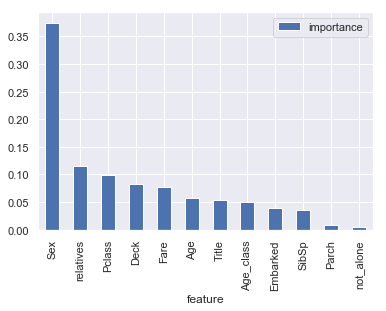

In [57]:
importances.plot.bar()

not_alone and Parch doesn't play a significant role in our Decision tree classifiers prediction process. Because of that I will
drop them from the dataset and train the classifier again. We could also remove more or less features, but this would need a
more detailed investigation of the features effect on our model. But I think it's just fine to remove only not_Alone and Parch.

# Final Model
Random Forest

In [58]:
rf=RandomForestClassifier(n_estimators=100,oob_score=True)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
rf.score(X_train,Y_train)
acc_rf=round(rf.score(X_train,Y_train)*100,2)
print("Ranodm forest Accuracy is : ",round(acc_rf,2,),"%")

Ranodm forest Accuracy is :  92.82 %


Our random forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely
your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

There is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we
used before. What I am talking about is the out-of-bag samples to estimate the generalization accuracy. I will not go into
details here about how it works. Just note that out-of-bag estimate is as accurate as using a test set of the same size as the
training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.
Below

In [59]:
print("Random forest OOB score is :",round(rf.oob_score_,5)*100,"%")

Random forest OOB score is : 81.594 %


Below you can see the code of the hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split
and n_estimators.

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16,18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

clf.bestparams

Using best params for modelling

In [60]:
rf=RandomForestClassifier(criterion='gini',
                         min_samples_leaf=1,
                         min_samples_split=10,
                         n_estimators=100,
                         max_features='auto',
                         oob_score=True,
                         random_state=1,
                         n_jobs=1)
rf.fit(X_train,Y_train)
Y_Prediction=rf.predict(X_test)
rf.score(X_train,Y_train)
print("Random forest OOB score is :",round(rf.oob_score_,5)*100,"%")

Random forest OOB score is : 82.828 %


Now that we have a proper model, we can start evaluating it's performace in a more accurate way. Previously we only used
accuracy and the oob score, which is just another form of accuracy. The problem is just, that it's more complicated to
evaluate a classification model than a regression model. We will talk about this in the following section.

# Metrics

In [61]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions=cross_val_predict(rf,X_train,Y_train)
print("results of confusion matrix")
confusion_matrix(Y_train,predictions)

results of confusion matrix


array([[493,  56],
       [ 96, 246]], dtype=int64)

The first row is about the not-survived-predictions: 493 passengers were correctly classified as not survived (called true
negatives) and 56 where wrongly classified as not survived (false negatives).
    
The second row is about the survived-predictions: 93 passengers where wrongly classified as survived (false positives) and
249 where correctly classified as survived (true positives).

A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like
computing the classifiers precision.

In [62]:
from sklearn.metrics import recall_score,precision_score
print("Precision score:",precision_score(Y_train,predictions))
print("Recall score:",recall_score(Y_train,predictions))

Precision score: 0.8145695364238411
Recall score: 0.7192982456140351


Our model predicts 82% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival
of 71 % of the people who actually survived.

You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic
mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only
get a high F-score, if both recall and precision are high.

In [63]:
from sklearn.metrics import f1_score
f1_score(Y_train,predictions)

0.7639751552795032

There we have it, a 76.36 % F-score. The score is not that high, because we have a recall of 73%.
But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a
problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing
precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the
precision/recall tradeoff. We will discuss this in the following section.

In [64]:
from sklearn.metrics import precision_recall_curve
#geting the probabilities of predictions
y_scores=rf.predict_proba(X_train)
y_scores=y_scores[:,1]
precision,recall,threshold=precision_recall_curve(Y_train,y_scores)

curve out put as follows:


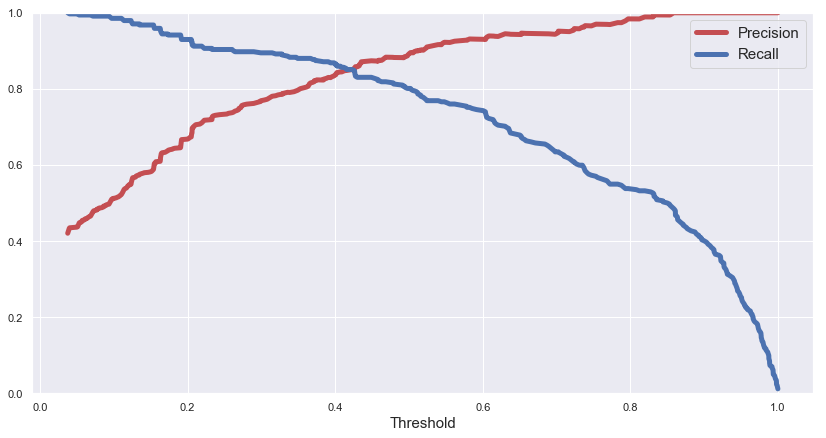

In [65]:
def plot_precision_and_recall(precision,recall,threshold):
    plt.plot(threshold,precision[:-1],"r-",label="Precision",linewidth=5)
    plt.plot(threshold,recall[:-1],"b",label="Recall",linewidth=5)
    plt.xlabel("Threshold",fontsize=15)
    plt.legend(loc="upper right",fontsize=15)
    plt.ylim([0,1])

plt.figure(figsize=(14,7))
plot_precision_and_recall(precision,recall,threshold)
print("curve out put as follows:")
plt.show()

Above you can clearly see that the recall is falling of rapidly at a precision of around 85%. Because of that you may want to
select the precision/recall tradeoff before that - maybe at around 75 %.

You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning
problem. If you want for example a precision of 80%, you can easily look at the plots and see that you would need a threshold
of around 0.4. Then you could train a model with exactly that threshold and would get the desired accuracy.

Another way is to plot the precision and recall against each other

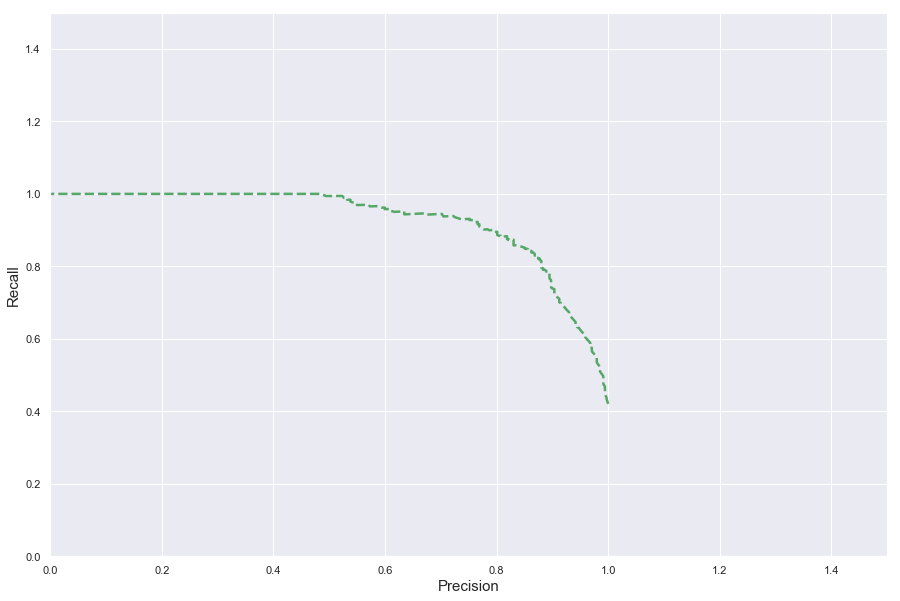

In [66]:
def plot_precision_vs_recall(precision,recall):
    plt.plot(recall,precision,"g--",linewidth=2.5)
    plt.ylabel("Recall",fontsize=15)
    plt.xlabel("Precision",fontsize=15)
    plt.axis([0,1.5,0,1.5])
    
plt.figure(figsize=(15,10))
plot_precision_vs_recall(precision,recall)
plt.show()

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true
positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall

In [67]:
from sklearn.metrics import roc_curve
#compute true positive rate and false positive rate
false_positive_rate,true_positive_rate,threshold=roc_curve(Y_train,y_scores)


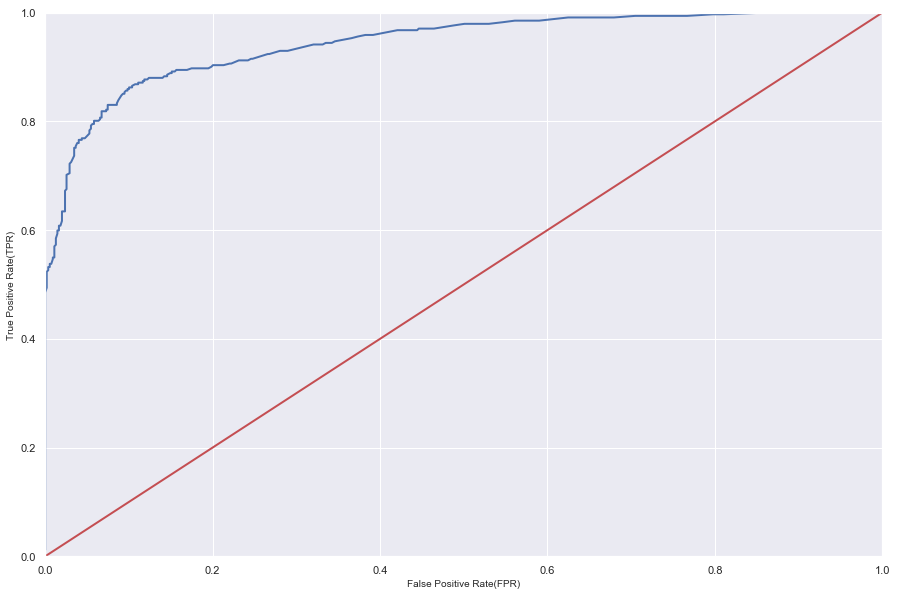

In [68]:
#Plotting them 
def plot_roc_curve(false_positive_rate,true_positive_rate,label=True):
    plt.plot(false_positive_rate,true_positive_rate,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'r',linewidth=2)
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate(FPR)",fontsize=10)
    plt.ylabel("True Positive Rate(TPR)",fontsize=10)
    
plt.figure(figsize=(15,10))
plot_roc_curve(false_positive_rate,true_positive_rate)
plt.show()

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the
curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of
0.5.

In [69]:
from sklearn.metrics import roc_auc_score
r_a_score=roc_auc_score(Y_train,y_scores)
print("ROC_AUC_Score is :",round(r_a_score,4)*100,"%")

ROC_AUC_Score is : 94.31 %
